In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)

In [2]:
# Import Data From Preliminary Analysis
df_hist = pd.read_pickle('calculations\df_hist.pickle')
df_spec = pd.read_pickle('calculations\df_spec.pickle')
df_arch = pd.read_pickle('calculations\df_arch.pickle')
df_recommendations = pd.read_pickle('calculations\df_recommendations.pickle')

In [3]:
# plotting function

def plot_fork_length_by_sample(df_specimen, df_historical, sample_id, feature='fork_length', bin_width=5, density=False, subtitle='', duplicate='unknown'):
    """ duplicate can be True, False, or 'unknown' """
    
    figsize=(12,3)
    bins_plot = [x*5 + 20 for x in range(30)]  # centered on n%5==3 like df_spec, rounded to int%5 (could use +20.5 also to center perfectly on n%5==3)
    
    if duplicate == 'unknown':
        colours = sns.color_palette()[0], sns.color_palette('pastel')[1]
    elif duplicate: # duplicated
        colours = sns.color_palette()[0], sns.color_palette('pastel')[2]
    else: # not duplicated
        colours = sns.color_palette()[0], sns.color_palette('deep')[6]
        
    plt.figure(figsize=figsize)
    plt.xlim(20, 170)  # use same scale for all histograms for easy comparison
    df_specimen.loc[df_specimen.sample_id==sample_id, feature].dropna().hist(alpha=0.6, color=colours[0], density=density, label=f'Specimen {feature}', bins=bins_plot)
    df_historical.loc[df_historical.sample_id==sample_id, feature].dropna().hist(alpha=0.8, color=colours[1], density=density, label=f'Bioligical {feature}', bins=bins_plot, rwidth=0.7)
    
    feature_title = feature.title().replace("_"," ")
    plt.legend(loc='upper right')
    subtitle = ' - ' + subtitle if subtitle else ''
    plt.title(f'Sample {sample_id}: {feature_title} Comparison - Specimen vs Biological Data{subtitle}')
    plt.ylabel('Counts')
    plt.xlabel(f'{feature_title}')
    plt.show()


# RECOMMENDATIONS

In [4]:
all_flags = ['specimen_data', 'enough_spec_data', 'low_error_sample', 'high_MSE_potential_duplicate', 'matched_counts']
other_columns = ['n_hist', 'n_spec', 'matched_proportion', 'sample_SSE', 'MSE']

# RECOMMENDATION: specimen_data == False
### duplicate = False

In [16]:
print('Summary Flag:', flag := all_flags[0])
display(df_recommendations[df_recommendations[flag].notnull()][['n_hist','n_spec']])

Summary Flag: specimen_data


,n_hist,n_spec
sample_id,,
4390,34,0
4391,14,0
4392,13,0
4393,3,0
4394,21,0
4395,17,0
4396,9,0
4397,23,0
4398,19,0


# RECOMMENDATION: enough_spec_data == False
### duplicate = False

In [6]:
print('Summary Flag:', flag := all_flags[1])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns])

Summary Flag: enough_spec_data


,n_hist,n_spec,matched_proportion,sample_SSE,MSE
sample_id,,,,,
5246,22,7,0.136,1902.000,86.455
5266,14,2,0.143,1210.000,86.429
5270,20,3,0.050,1900.000,95.000
5271,30,5,0.167,2519.000,83.967
5348,11,10,0.182,910.000,82.727
5357,20,2,0.100,1802.000,90.100
7532,17,6,0.294,1231.000,72.412
7857,51,32,0.569,2230.000,43.725


# RECOMMENDATION: low_error_samples == True
### duplicate = True

In [7]:
print('Summary Flag:', flag := all_flags[2])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns].describe())

Summary Flag: low_error_sample


,n_hist,n_spec,matched_proportion,sample_SSE,MSE
count,264.000,264.000,264.000,264.000,264.000
mean,24.076,101.527,0.993,89.364,3.469
std,25.593,118.538,0.014,108.759,1.913
min,1.000,1.000,0.938,0.000,0.000
25%,5.000,34.000,1.000,16.000,2.129
50%,12.000,68.000,1.000,37.000,3.167
75%,34.000,126.500,1.000,133.250,4.804
max,136.000,893.000,1.000,629.000,9.000


In [8]:
# check outlier
df_recommendations[df_recommendations.sample_SSE==629]

,n_hist,n_spec,matched_proportion,sample_SSE,MSE,specimen_data,enough_spec_data,low_error_sample,high_MSE_potential_duplicate,matched_counts
sample_id,,,,,,,,,,
5580,115,854,0.974,629.000,5.470,NaN,NaN,True,NaN,NaN


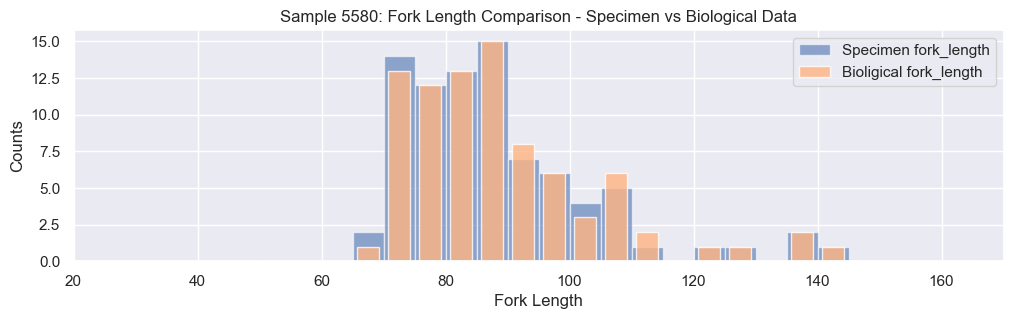

In [9]:
# looks slightly shifted but definitely looks like a match
#  fresh vs frozen fork length maybe? 
#  looks like the opposite, I would guess bio would be more likley to be frozen, thus shorter?

plot_fork_length_by_sample(df_spec[df_spec.fork_length>65], df_hist[df_hist.fork_length>65], 5580)

# RECOMMENDATIONS: 
### high_MSE_potential_duplicate == False  ->  duplicate = False
### high_MSE_potential_duplicate == True  ->  duplicate = True or None
### recommend inspecting histograms for more potential duplicates

In [10]:
print('Summary Flag:', flag := all_flags[3])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns + ['high_MSE_potential_duplicate']].describe(include='all'))

Summary Flag: high_MSE_potential_duplicate


,n_hist,n_spec,matched_proportion,sample_SSE,MSE,high_MSE_potential_duplicate
count,71.000,71.000,71.000,71.000,71.000,71
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,63
mean,16.620,37.127,0.291,3946.845,3278.528,NaN
std,14.533,55.185,0.250,4264.497,4685.169,NaN
min,1.000,0.000,0.000,100.000,40.944,NaN
25%,6.000,1.000,0.000,655.500,47.062,NaN
50%,13.000,22.000,0.308,1433.000,70.038,NaN
75%,23.500,45.500,0.547,9999.000,9999.000,NaN


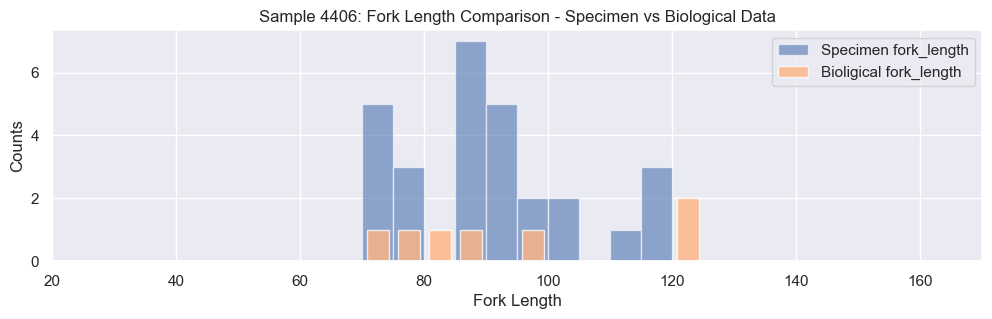

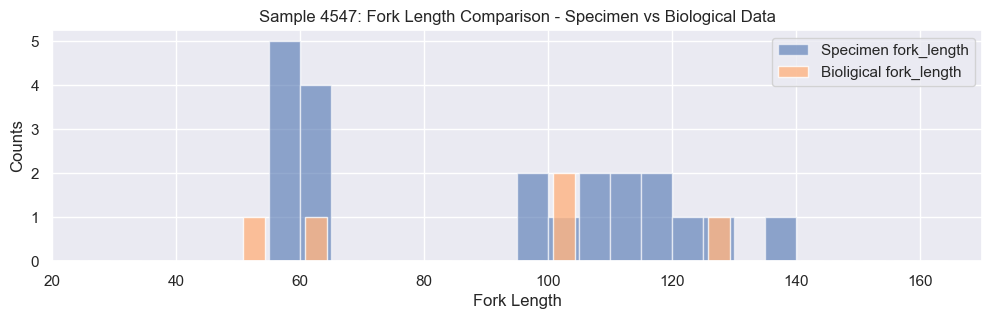

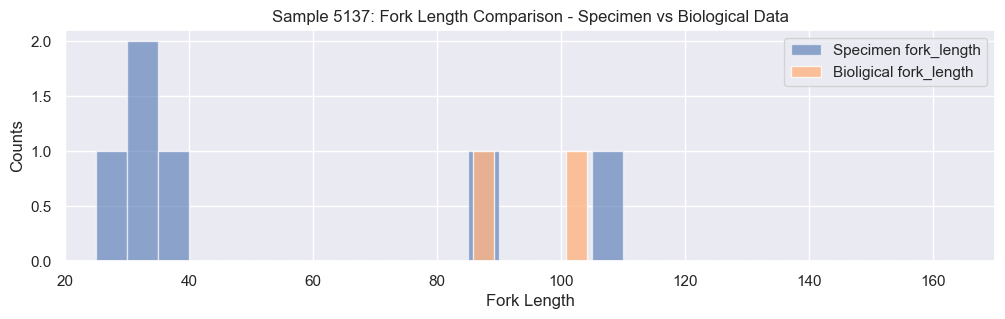

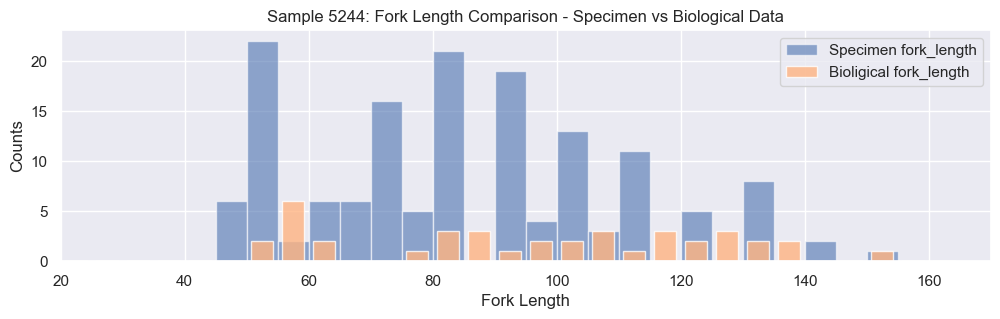

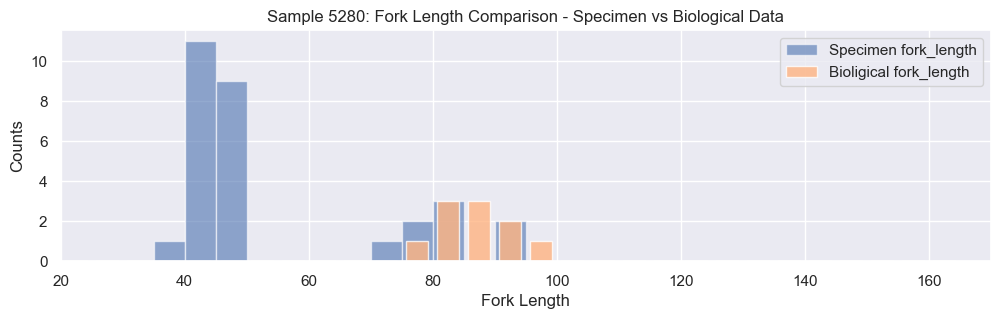

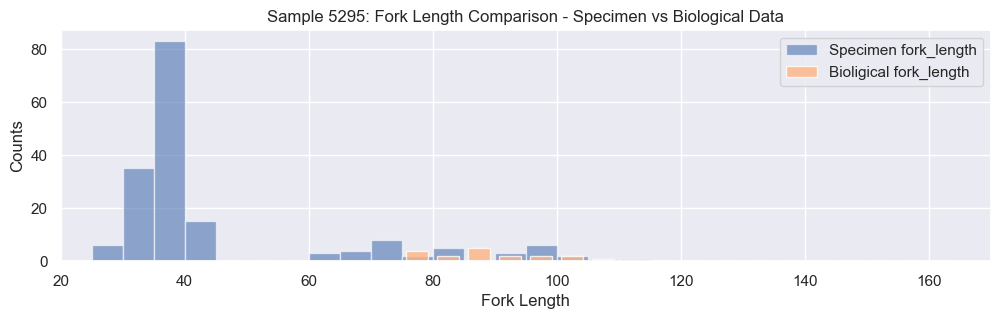

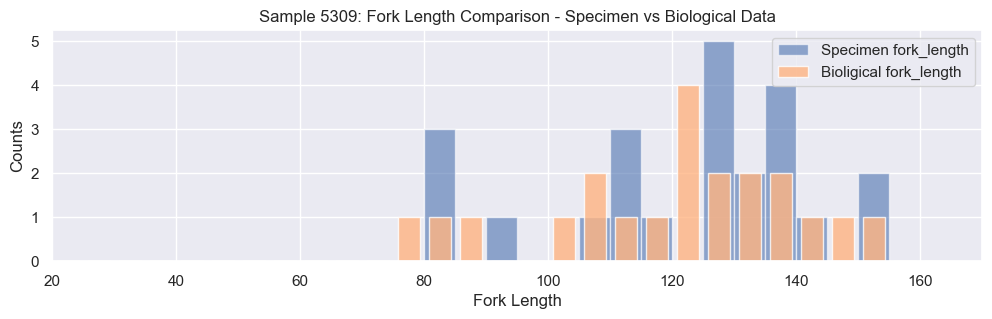

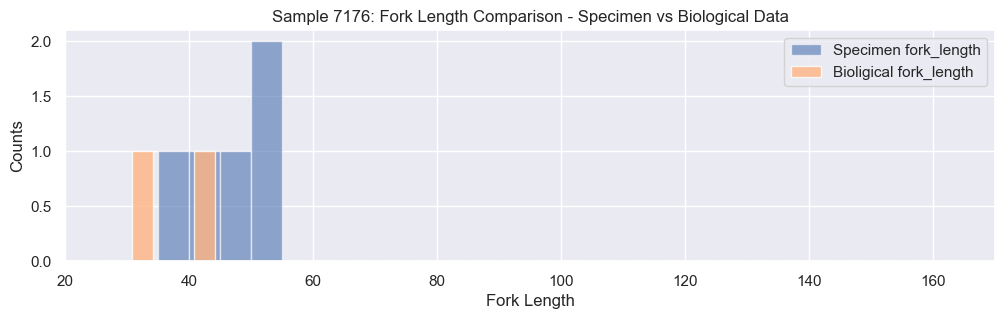

In [11]:
# these look like potential duplicates even though they have high error
for i in df_recommendations[df_recommendations[flag] == True].index:
    plot_fork_length_by_sample(df_spec, df_hist, i)

# RECOMMENDATIONS: matched_counts == True
### duplicate = True
### inspect histograms for exceptions

In [12]:
print('Summary Flag:', flag := all_flags[4])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns].describe())

Summary Flag: matched_counts


,n_hist,n_spec,matched_proportion,sample_SSE,MSE
count,179.000,179.000,179.000,179.000,179.000
mean,54.302,54.302,0.815,1116.525,131.017
std,62.732,62.732,0.138,1517.185,1051.953
min,1.000,1.000,0.000,0.000,0.000
25%,11.000,11.000,0.772,220.500,12.268
50%,33.000,33.000,0.833,587.000,18.919
75%,68.000,68.000,0.895,1335.500,24.913
max,346.000,346.000,1.000,9999.000,9999.000


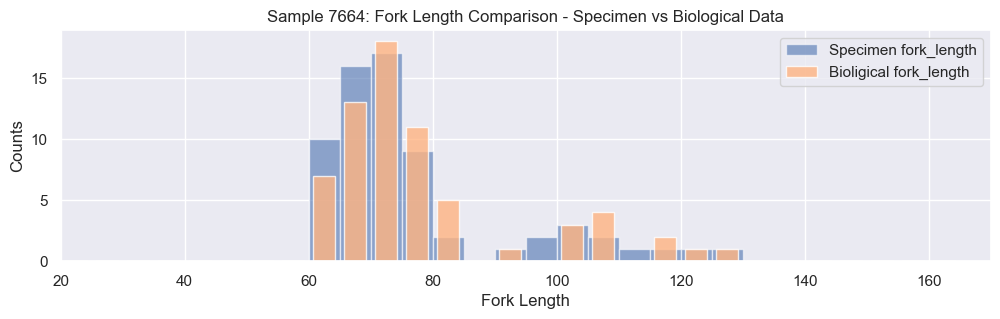

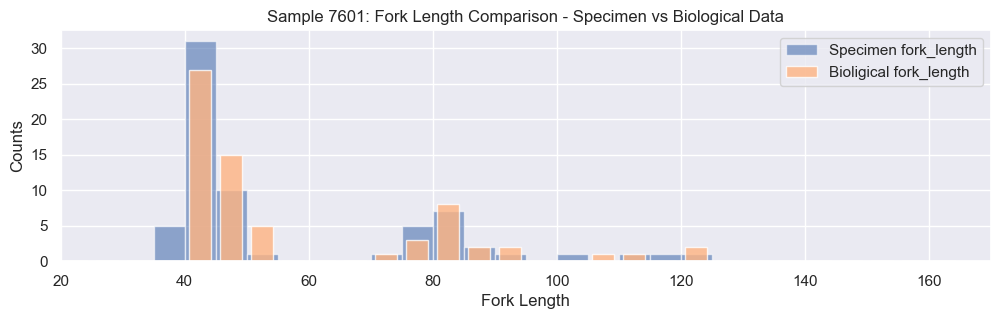

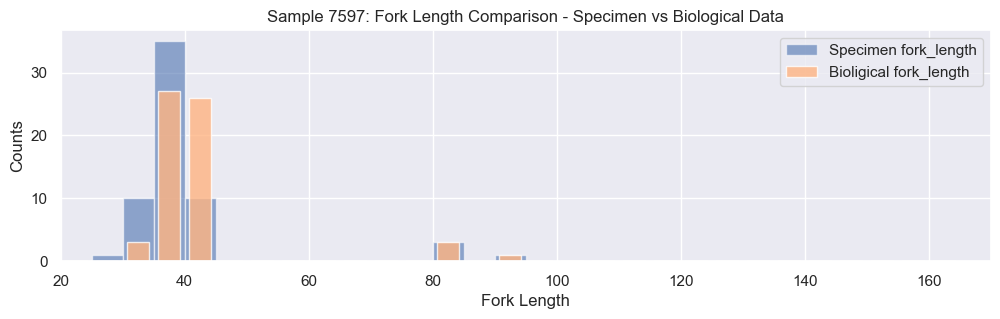

In [13]:
# let's check a few outliers
for i in df_recommendations[(df_recommendations.matched_counts==True) & (df_recommendations.sample_SSE>1000)].sample(3).index:
    plot_fork_length_by_sample(df_spec, df_hist, i)

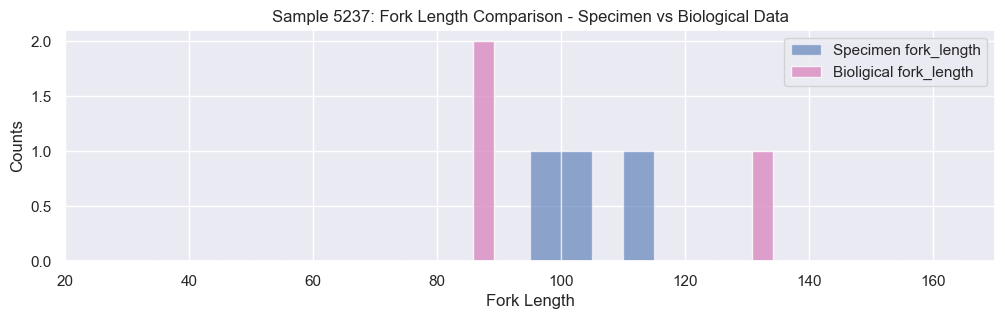

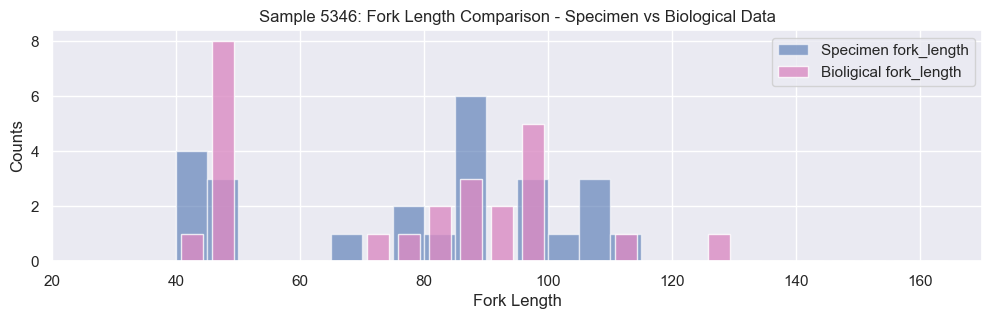

In [14]:
potential_exceptions = [5237, 5346]
for i in potential_exceptions:
    plot_fork_length_by_sample(df_spec, df_hist, i, duplicate=False)